In [273]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier


from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

from sklearn import model_selection
#Load the cross-validation method
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
#Load the mean squared error method
from sklearn.metrics import mean_squared_error
#Load the function for creating a scorer
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate

In [336]:
df1 = pd.read_pickle('df_new.pkl')

Binary coding for the target 0 = show , 1 = no show , gender 0=male , 1 = female .
chnaging the 'diff_day' column to 'waiting days'


In [337]:
#Gender,disease column to binry 
df1['Gender']=(df1['Gender'] == 'F').astype('int')
df1=df1.rename(columns={'diff_day':'waiting_days'})

# drop feature

drop the patientid, appointment id, the dates of appointment day and the scheduled day- the first dataset is just with 
14 feratures

In [338]:
col_todrop1=['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood',\
            'DayName_AppointmentDay','DayName_schedualed','age_ranges','categor_wait','ScheduledDay_minute'\
           ,'sum_missed_appointment','Appointment','total_prior_appointments','disease','missed_appointment_before']

In [339]:
#df=drop_cols(df1,col_todrop1,'Neighbourhood').copy() # without unique id
df1['Appointment']=1
df=df1.drop(col_todrop1,axis=1).copy()
#df=df1.drop_duplicates(subset='PatientId', keep="last").copy()
#df=df.drop(col_todrop1,axis=1).copy()
df.shape

(110516, 14)

here the feature that i used - 14 features

In [340]:
df1.columns.tolist()

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'Absent',
 'waiting_days',
 'DayName_AppointmentDay',
 'DayName_schedualed',
 'ScheduledDay_day',
 'ScheduledDay_hour',
 'ScheduledDay_minute',
 'AppointmentDay_day',
 'total_prior_appointments',
 'age_ranges',
 'categor_wait',
 'total_disease',
 'disease',
 'missed_appointment_before',
 'sum_missed_appointment',
 'Appointment']

# split the data 

In [341]:
from sklearn.model_selection import train_test_split
# Create feature and target arrays
y = df.Absent
X = df.drop('Absent', axis=1)

In [342]:
df.Absent.value_counts(normalize=True)

0    0.79812
1    0.20188
Name: Absent, dtype: float64

In [343]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_temp, y, test_size = 0.2, random_state=42,stratify=y)


# machine learning

here i built 3 functions , the first one called individual_classifiers 
with random forest, naive bayes, knn and random forest , all of them are with default parameter 
just to see the results with first data set that i used 


baseline -- these function take the train and the test set , 
#for every classifiers i used 5 fold cross validation for the train set, the scoring that i used is
['precision', 'recall', 'f1','accuracy']

In [344]:
def  individual_classifier (X_train, y_train,X_test,y_test):
#these function has individual classifiers, with random forest, naive bayes, knn and random forest
#all of them are with default parameter. just want to see the results with 5 fold cross validation.
# these function print a classification report for the test for every classifier. and return a dictionary with 
#the scoring of f1, recall,precision, accuracy for the test and train for each classifer 
#for each fold from the 5 fold cross validation

    SEED=1    
        # Instantiate lr
    lr = LogisticRegression(random_state=SEED)

        # Instantiate knn
    knn = KNeighborsClassifier(n_neighbors=7)


        # Instantiate rf
    rf=RandomForestClassifier(n_estimators=20,
                    random_state=SEED)

        # Instantiate naive bayes
    gnb = GaussianNB()

        # Instantiate SVM

        # Define the list classifiers
    classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),('RandomForest',rf),\
                      ('gausian naive bayes',gnb)]
        # Iterate over the pre-defined list of classifiers
    accuracy_eval={}
        #train_scores={}
    report=[]
    scoring = ['precision', 'recall', 'f1','accuracy']
    for clf_name, clf in classifiers:    
            cv1 = cross_validate(estimator=clf,
                                 X=X_train,
                                y=y_train,
                                cv=5,
                                scoring=scoring,return_train_score=True)
         
            clf.fit(X_train, y_train)    
            print('{:s}',clf_name)
            print(classification_report(y_test,clf.predict(X_test)))
            
            accuracy_eval[clf_name]=cv1
    return(accuracy_eval)       

In [345]:
def print_report(report1):
    # these function take the accuracy eval from the first function, and print the mean of the accuracy,f1,
    #recall for the 5 fold cross validation for each classifier
    
    for isbn in report1:    
        print('\nmodel:',isbn)
        print('test precision:',report1[isbn]['test_precision'].mean())
        print('test recall:',report1[isbn]['test_recall'].mean())
        print('test f1:',report1[isbn]['test_f1'].mean())
        print('test accuracy:',report1[isbn]['test_accuracy'].mean())

        print('train precision:',report1[isbn]['train_precision'].mean())
        print('train recall:',report1[isbn]['train_recall'].mean())
        print('train f1:',report1[isbn]['train_f1'].mean())
        print('train accuracy:',report1[isbn]['train_accuracy'].mean())    

In [346]:
import itertools

In [347]:
def report_figure(report_class):
    # these function also use the accuracy_eval dictionary from the first function , and plot a figures for each
    #classifier, we can see if there is an overfitting or not, thesis function all the average metric 
    i=0
    #fig,ax=plt.subplots(1,4,sharey=True)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 3),sharey=True)
    #fig,axes = plt.figure()
    for isbn in report_class:
        axes[i] = fig.add_subplot()
        data=pd.DataFrame(columns=['train/test','metric','scroring_value'])
        data['train/test']=['train']*(20)+['test']*(20)
        data['metric']=['precision','recall','f1','accuracy']*(10)
        score_values_test= [[report_class[isbn]['train_precision'][j],\
        report_class[isbn]['train_recall'][j],\
        report_class[isbn]['train_f1'][j],\
        report_class[isbn]['train_accuracy'][j]] for j in range (5)]

        flatten_test =  list(itertools.chain.from_iterable(score_values_test))   


        score_values_train= [[report_class[isbn]['test_precision'][j],\
        report_class[isbn]['test_recall'][j],\
        report_class[isbn]['test_f1'][j],\
        report_class[isbn]['test_accuracy'][j]] for j in range (5)]

        flatten_train =  list(itertools.chain.from_iterable(score_values_train)) 

        data['scroring_value']=flatten_test+flatten_train
        axes[i]=sns.catplot(x="train/test", y="scroring_value", hue="metric", kind="point", data=data,\
                     capsize=0.01,title="model"+str(isbn));
        axes[i].fig.suptitle("model:"+str(isbn))
        #plt.bar(*zip(*dict_train.items()))
        plt.show()
        i+=1
    

In [348]:
# bagging 
#here i also want to check another model like bagging, adaboost, xgboost, to see the accuracy and the other metrics 
def bagging(X_train, y_train,X_test,y_test):
    # Split into training and test set
    #X_train1, X_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.2, random_state=42,stratify=y_data)
    # Set seed for reproducibility
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)

    SEED=1

  
    # Instantiate dt
    dt = DecisionTreeClassifier(max_depth=4,random_state=1)

    # Instantiate bc
    bc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=1,oob_score=True)


    # Instantiate adaboost
    ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)
    
    
    # gradient boost
    gb = GradientBoostingClassifier(max_depth=4,n_estimators=100, random_state=1)
    
    #xgboost
    xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=1)                           
    

    # Define the list classifiers
    classifiers = [('bagging', bc), ('adaboost', ada), ('gradient boost', gb),('XGBClass',xg_cl)]
    # Iterate over the pre-defined list of classifiers
    accuracy_eval={}
    for clf_name, clf in classifiers:    

        # Fit clf to the training set
        clf.fit(X_train, y_train)    

        # Predict y_pred
        y_pred_v = clf.predict(X_test)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_v)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        # Calculate accuracy
        #accuracy = accuracy_score(y_test1, y_pred_v) 
        #accuracy_eval[clf_name]=accuracy
        # Evaluate clf's accuracy on the test set
        #print('{:s} : {:.3f}'.format(clf_name, accuracy))
        print('{:s}',clf_name)
        print(classification_report(y_test, y_pred_v))
        print('roc_auc is {:.3f}'.format(roc_auc))
    #return(accuracy_eval)   

here we can see the with the first dataset with 14 features - the is imbalanced 
we can see that all the classifers have a low precision and recall for the no show (1)

In [349]:
report1=individual_classifier(X_train, y_train,X_test,y_test)

{:s} Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17642
           1       0.33      0.01      0.03      4462

    accuracy                           0.80     22104
   macro avg       0.56      0.50      0.46     22104
weighted avg       0.70      0.80      0.71     22104

{:s} K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     17642
           1       0.37      0.16      0.23      4462

    accuracy                           0.77     22104
   macro avg       0.59      0.55      0.55     22104
weighted avg       0.72      0.77      0.74     22104

{:s} RandomForest
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     17642
           1       0.38      0.20      0.26      4462

    accuracy                           0.77     22104
   macro avg       0.60      0.56      0.56     22104
weigh

here we can see the results of the different models, we can see the results of precision,
recall, f1, accuracy in the train and test set . 

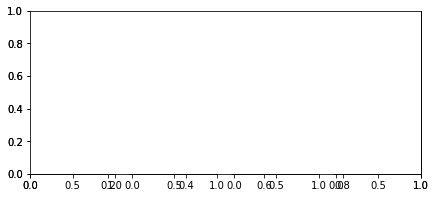

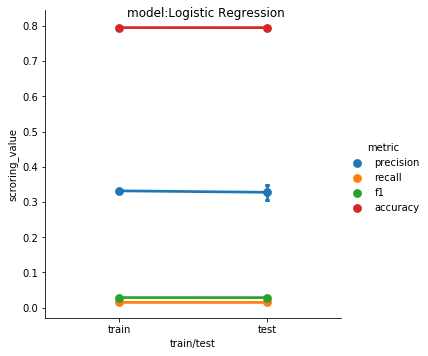

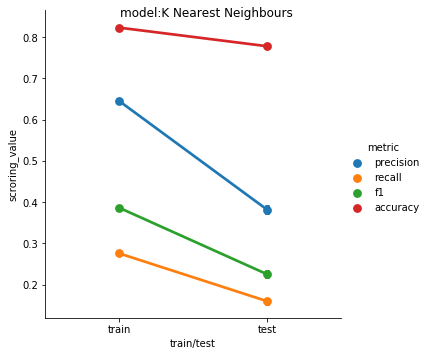

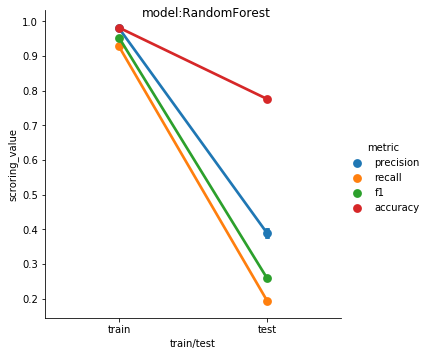

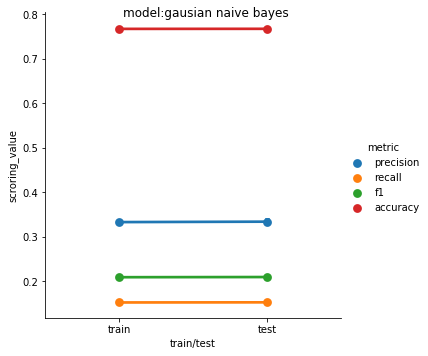

In [259]:
report_figure(report1)

here i used another classifiers like baging, adaboost, gradient boost, and xgboost, 
it look the same results as with the other classifiers that i used before 

In [262]:
report_bagging=bagging(X_train, y_train,X_test,y_test)

{:s} bagging
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4462

    accuracy                           0.80     22104
   macro avg       0.40      0.50      0.44     22104
weighted avg       0.64      0.80      0.71     22104

roc_auc is 0.500
{:s} adaboost
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17642
           1       0.42      0.10      0.16      4462

    accuracy                           0.79     22104
   macro avg       0.61      0.53      0.52     22104
weighted avg       0.73      0.79      0.74     22104

roc_auc is 0.532
{:s} gradient boost
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.46      0.01      0.02      4462

    accuracy                           0.80     22104
   macro avg       0.63      0.50      0.45    

# step2-balancing the data

There is a Class Imbalance in the data set, the no-show appointments only represent 20.2% 
of the response variable, appointment status. so these classifiers
maybe just predict the patient who came to their appointments (0).
The imbalanced nature of the data is addressed by implementing the Synthetic Minority 
Over-sampling Technique (SMOTE) algorithm. By utilizing the SMOTE algorithm, “the minority 
class is over-sampled by creating synthetic examples rather than by over-sampling
Wich allow the classifier to better learn the feature/target.



In [263]:
# here i will balance the data with smoote 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train, y_train)

here we can see that after making SmOTE to the train data , the recall increasd in all classifier, but
it still low.

{:s} Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     17642
           1       0.26      0.55      0.35      4462

    accuracy                           0.59     22104
   macro avg       0.55      0.57      0.52     22104
weighted avg       0.72      0.59      0.63     22104

{:s} K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.86      0.67      0.75     17642
           1       0.31      0.57      0.40      4462

    accuracy                           0.65     22104
   macro avg       0.58      0.62      0.58     22104
weighted avg       0.75      0.65      0.68     22104

{:s} RandomForest
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     17642
           1       0.32      0.40      0.36      4462

    accuracy                           0.71     22104
   macro avg       0.58      0.59      0.59     22104
weigh

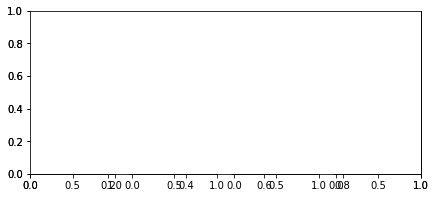

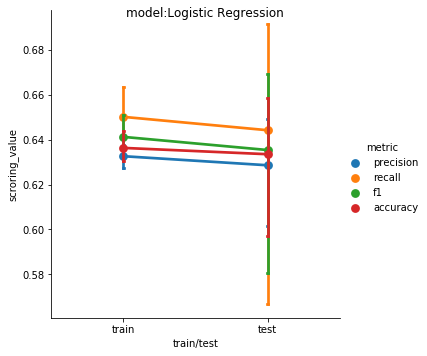

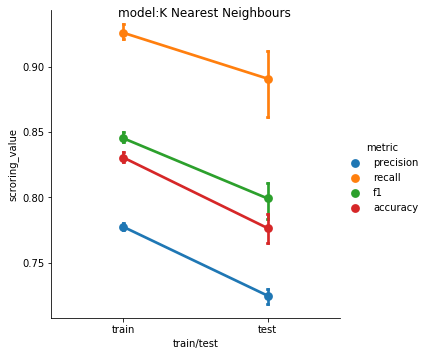

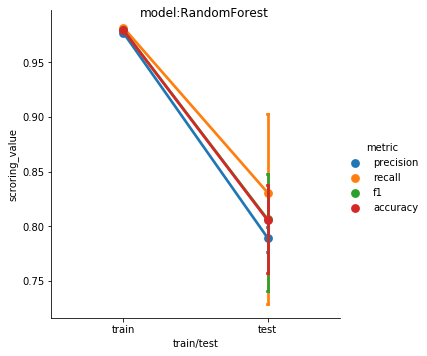

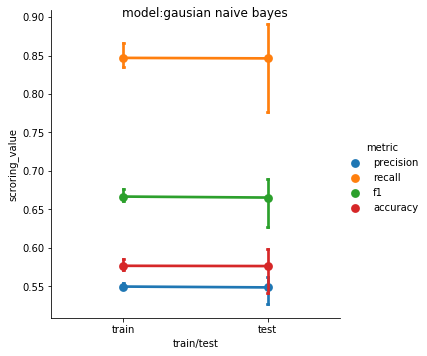

In [264]:
report1=individual_classifier(X_train, y_train,X_test,y_test)
report_figure(report1)

here we see the smae results  with bagging classifiers ( with the SMOTE data )

In [265]:
report_bagging=bagging(X_train, y_train,X_test,y_test)
report_bagging

{:s} bagging
              precision    recall  f1-score   support

           0       0.91      0.53      0.67     17642
           1       0.30      0.80      0.44      4462

    accuracy                           0.58     22104
   macro avg       0.61      0.66      0.55     22104
weighted avg       0.79      0.58      0.62     22104

roc_auc is 0.663
{:s} adaboost
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     17642
           1       0.32      0.57      0.41      4462

    accuracy                           0.66     22104
   macro avg       0.59      0.63      0.59     22104
weighted avg       0.75      0.66      0.69     22104

roc_auc is 0.631
{:s} gradient boost
              precision    recall  f1-score   support

           0       0.88      0.63      0.73     17642
           1       0.31      0.66      0.42      4462

    accuracy                           0.64     22104
   macro avg       0.60      0.65      0.58    

# step3: add two features for the appointment history of the patient 

: I added two feature for the appointment history of the patient , one of them is for the total prior appointment 
    and the second one is for the total missed appointment . so every time the patient make a new appointment ,
    the total prior appointment and the total missed appointments will appear beside the patient’s information ,
    and it will updated when he 
    make a new appointment.

In [350]:
prior_total_missed=df1.groupby('PatientId')['Absent'].cumsum().to_frame().rename\
(columns={'Absent':'prior_total_missed'})
# join the prior total missed appointement to the dataset 
df=df.merge(prior_total_missed , left_index =True, right_index=True, how = "outer")   

In [351]:
total_prior_appoitments=df1.groupby('PatientId')['Appointment'].cumsum().to_frame().rename\
(columns={'Appointment':'prior_total_appointments'})
df=df.merge(total_prior_appoitments , left_index =True, right_index=True, how = "outer")

In [352]:
df['prior_total_appointments']=df['prior_total_appointments']-1

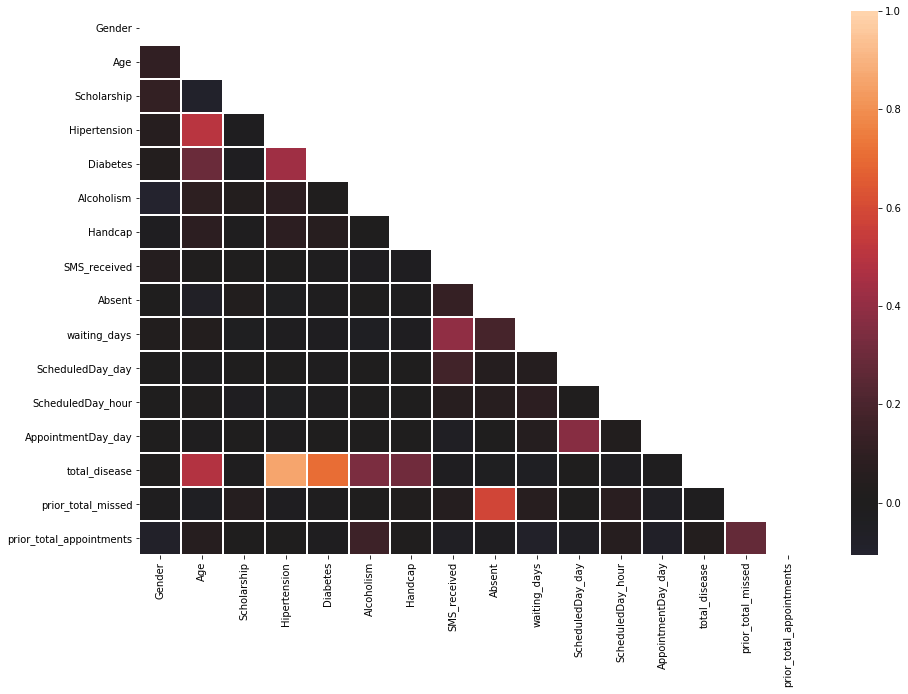

In [358]:
# Create the correlation matrix
#corr = df1.drop(col_todrop1,axis=1).corr()
corr=df.corr()
fig,ax= plt.subplots(figsize=(15,10))
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, fmt=".2f")
plt.show()

the data here has 16 features , the train data are balanced also with SMOTE

In [353]:

#df=df1.copy()
y=df.Absent
X = df.drop('Absent', axis=1)
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=y)

In [354]:
X_train,y_train=sm.fit_resample(X_train, y_train)

here we can see that the differnet classifers has a high accuracy, and high precision.

In [355]:
report2=individual_classifier(X_train, y_train,X_test,y_test)

{:s} Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17642
           1       0.74      0.96      0.84      4462

    accuracy                           0.92     22104
   macro avg       0.87      0.94      0.89     22104
weighted avg       0.94      0.92      0.93     22104

{:s} K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     17642
           1       0.41      0.70      0.52      4462

    accuracy                           0.74     22104
   macro avg       0.66      0.72      0.67     22104
weighted avg       0.81      0.74      0.76     22104

{:s} RandomForest
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     17642
           1       0.80      0.92      0.86      4462

    accuracy                           0.94     22104
   macro avg       0.89      0.93      0.91     22104
weigh

In [271]:
print_report(report2)


model: Logistic Regression
test precision: 0.8620593427976775
test recall: 0.8337159307544818
test f1: 0.8476315950100002
test accuracy: 0.9394878567588432
train precision: 0.8626550838168102
train recall: 0.8345005378017865
train f1: 0.8483433745655111
train accuracy: 0.9397649648606994

model: K Nearest Neighbours
test precision: 0.5903044511698476
test recall: 0.24774410520722717
test f1: 0.3488099224598014
test accuracy: 0.8133624422869847
train precision: 0.7961391760271967
train recall: 0.3851335745447419
train f1: 0.5191281392664067
train accuracy: 0.8559584697281288

model: RandomForest
test precision: 0.8582225097272287
test recall: 0.8548932803718292
test f1: 0.8565359724310815
test accuracy: 0.9421911005020405
train precision: 0.9990319309753325
train recall: 0.9971987265387281
train f1: 0.9981143925424488
train accuracy: 0.9992393566323908

model: gausian naive bayes
test precision: 0.6696075207251038
test recall: 0.592132956292632
test f1: 0.62839334951159
test accuracy: 

in the figure below we can see that there is maybe an overfittion, there is a difference between the train and
the test. so i choosed the logestec regression model becauce it has the best results after the random forest
and there is no overfitting

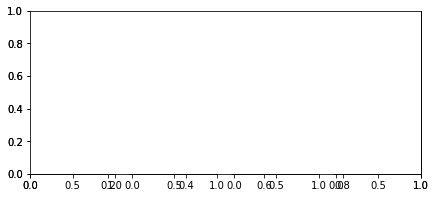

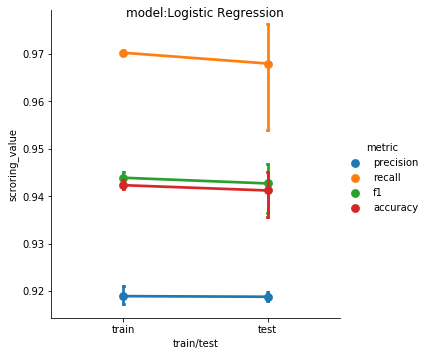

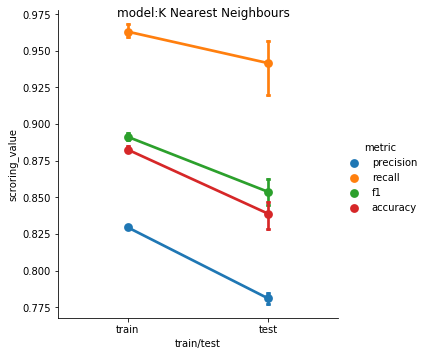

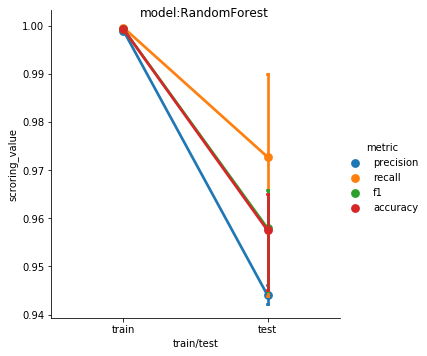

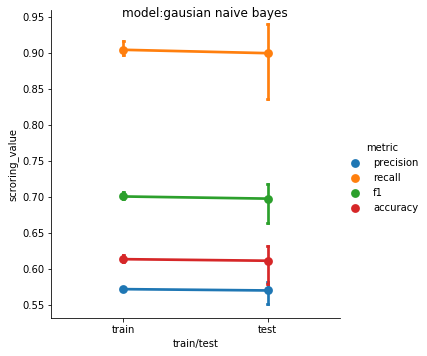

In [356]:
report_figure(report2)

here i used the bagging classifiers 

In [357]:
report_bagging2=bagging(X_train, y_train,X_test,y_test)

{:s} bagging
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17642
           1       0.75      0.97      0.85      4462

    accuracy                           0.93     22104
   macro avg       0.87      0.94      0.90     22104
weighted avg       0.94      0.93      0.93     22104

roc_auc is 0.944
{:s} adaboost
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     17642
           1       0.80      0.91      0.85      4462

    accuracy                           0.93     22104
   macro avg       0.89      0.93      0.90     22104
weighted avg       0.94      0.93      0.94     22104

roc_auc is 0.925
{:s} gradient boost
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     17642
           1       0.77      0.96      0.86      4462

    accuracy                           0.93     22104
   macro avg       0.88      0.95      0.91    

In [ ]:
# base line without grouping -all the data with waiting days + splitting the date 

here i wanted to tune the hyperparameter and to choose the best model for the random forest
and want to check the importance of the features

In [274]:
param_dist = {"max_depth": [2,4,6,8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16],
              "n_estimators" : [1, 2, 4, 8, 16, 32, 64, 100, 200]}


In [275]:
# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, make_scorer

In [276]:

rfc = RandomForestClassifier(random_state=1)

scorer = make_scorer(precision_score)

# Build a random search using param_dist, rfr, and scorer
rs =RandomizedSearchCV(estimator=rfc,param_distributions=param_dist,n_iter=10,cv=5,scoring=scorer)

In [277]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [334]:
# save the best model of the random forest , but these is not the final model

In [321]:
joblib.dump(rs, 'random_forset.pkl')


['random_forset.pkl']

In [278]:
y_pred = rs.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17642
           1       0.86      0.88      0.87      4462

    accuracy                           0.95     22104
   macro avg       0.92      0.92      0.92     22104
weighted avg       0.95      0.95      0.95     22104



here i check the feature importance by the randomn first, we can see that the prior total 
missed appointment is the most important feature 
after that the prior total appointments

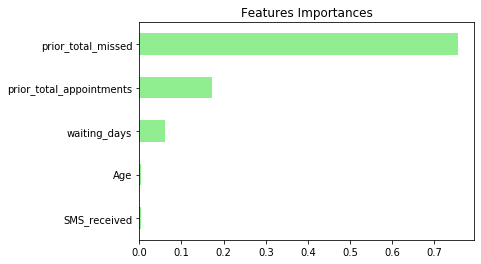

In [279]:
# Create a pd.Series of features importances
importances1 = pd.Series(data=rs.best_estimator_.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted1 = importances1.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted1[-5:].plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

from the results that we see before, i decided to choose the logestic regression model , 
because there was no overfitting, and there is a high accuracy , recall and precision.

# logestic regression

In [281]:
#reate the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred_logreg = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[17008   634]
 [  707  3755]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17642
           1       0.86      0.84      0.85      4462

    accuracy                           0.94     22104
   macro avg       0.91      0.90      0.91     22104
weighted avg       0.94      0.94      0.94     22104



In [286]:
# Set up cross_val_score
cv = cross_val_score(estimator=logreg,
                     X=X_train,
                     y=y_train,
                     cv=10,
                     scoring='accuracy')

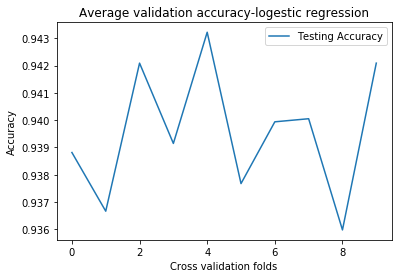

In [287]:
plt.title('Average validation accuracy-logestic regression')
plt.plot(cv, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Cross validation folds')
plt.ylabel('Accuracy')
plt.show()

##  Plotting an ROC curve
Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models.

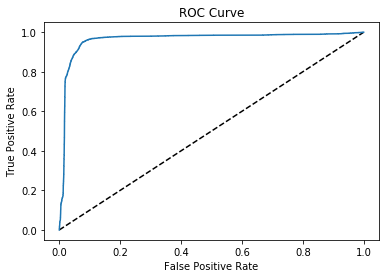

In [288]:

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## AUC computation
it is informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In [289]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))




AUC: 0.9630116408060285


### feature importance logestic regression

In [310]:
list(enumerate(importance_log))

[(0, -0.024187445336539548),
 (1, -0.0028053299806546595),
 (2, -0.07505290731028283),
 (3, 0.006926713584303303),
 (4, 0.018281471444476814),
 (5, 0.0683953273946122),
 (6, -0.0927795330774773),
 (7, 0.37597995123025074),
 (8, 0.019409686256663717),
 (9, 0.006940013387120783),
 (10, 0.017751408219377658),
 (11, 0.003896775475135468),
 (12, 0.0008239793459129795),
 (13, 4.444850737527591),
 (14, -1.2073776016671829)]

Feature: 0, Score: -0.02419
Feature: 1, Score: -0.00281
Feature: 2, Score: -0.07505
Feature: 3, Score: 0.00693
Feature: 4, Score: 0.01828
Feature: 5, Score: 0.06840
Feature: 6, Score: -0.09278
Feature: 7, Score: 0.37598
Feature: 8, Score: 0.01941
Feature: 9, Score: 0.00694
Feature: 10, Score: 0.01775
Feature: 11, Score: 0.00390
Feature: 12, Score: 0.00082
Feature: 13, Score: 4.44485
Feature: 14, Score: -1.20738


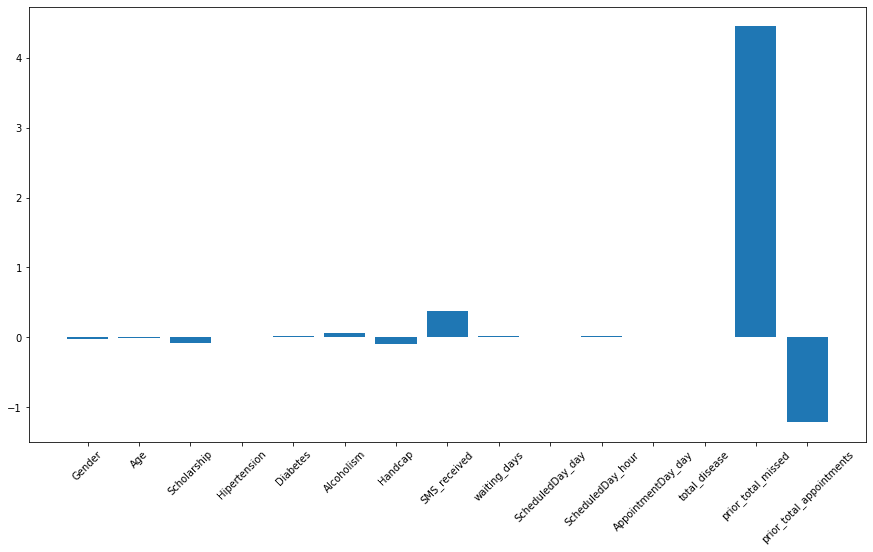

In [319]:
# get importance
fig,ax=plt.subplots(figsize=(15,8))
importance_log = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance_log):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
ax.bar([x for x in range(len(importance_log))], importance_log,tick_label=X_train.columns.tolist())
plt.xticks(rotation=45)
plt.show()

In [335]:
# here is my final model that i used for the dataset

In [320]:

from sklearn.externals import joblib
joblib.dump(logreg, 'logreg_final.pkl')


 

['logreg_final.pkl']

In [323]:
df.to_pickle('no_show_final16_feaures.pkl') 